In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import scipy
import numpy as np
import networkx as nx

%matplotlib notebook

# Trabalho/Prova 2 de Algebra Linear para Data Science

## Dataset utilizado "Credit Card Dataset for Clustering"

### O dataset contém dados de relativos ao comportamento quanto ao uso do cartão de crédito de 9000 clientes. Há 18 atributos descritores desse comportamento. O objetivo da disponibilização do dataset no Kaggle é a construção de grupos de clientes para implementação de estratégias de marketing direcionado

In [55]:
data = pd.read_csv('CC GENERAL.csv')

In [56]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [57]:
data[data.isnull().any(axis=1)].head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
56,C10058,3625.218146,1.000000,313.27,313.27,0.0,668.468743,0.250000,0.250000,0.000000,0.416667,5,4,4000.0,0.000000,NaN,0.0,12
63,C10065,7.152356,0.090909,840.00,840.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,NaN,0.0,12
93,C10098,1307.717841,1.000000,405.60,405.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,2400.0,0.000000,NaN,0.0,12
94,C10099,2329.485768,1.000000,213.34,213.34,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,2400.0,0.000000,NaN,0.0,12
97,C10102,3505.671311,1.000000,0.00,0.00,0.0,1713.984305,0.000000,0.000000,0.000000,0.500000,6,0,4000.0,0.000000,NaN,0.0,12


Temos muitos NaN na coluna MINIMUM PAYMENTS devemos substituir por algum valor

No describe vemos que não há valor 0, vamos colocar 0 para os NaN


In [58]:
data['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [59]:
data.loc[data['MINIMUM_PAYMENTS'].isna(), 'MINIMUM_PAYMENTS'] = 0
data[data['MINIMUM_PAYMENTS'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [60]:
data[data.isnull().any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


Ainda temos um NaN no limite de crédito, vamos fazer o mesmo processo para escolher um valor

In [62]:
print(data['CREDIT_LIMIT'].mode())
data['CREDIT_LIMIT'].describe()

0    3000.0
dtype: float64


count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

Por falta de conhecimento sobre os dados, vamos colocar a moda como limite de crédito

In [64]:
data.loc[data['CREDIT_LIMIT'].isna(), 'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].mode().values[0]
data[data['CREDIT_LIMIT'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


<IPython.core.display.Javascript object>


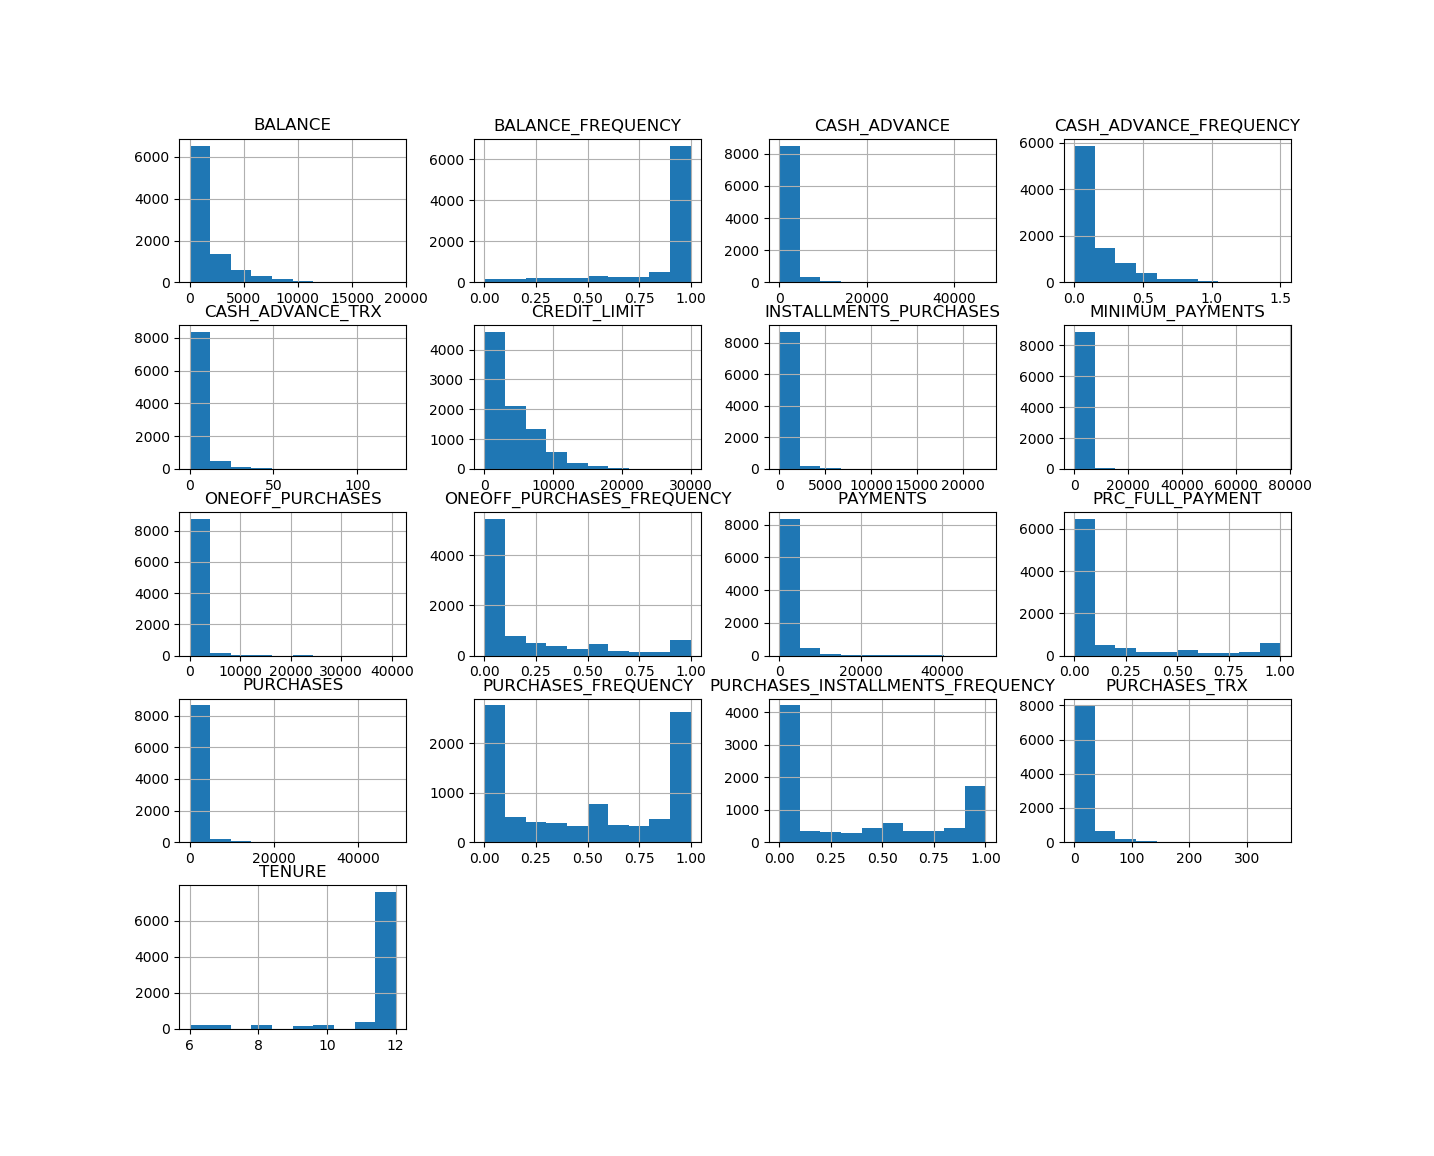

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1047176828>,
      dtype=object)

In [45]:
data.hist()

<IPython.core.display.Javascript object>


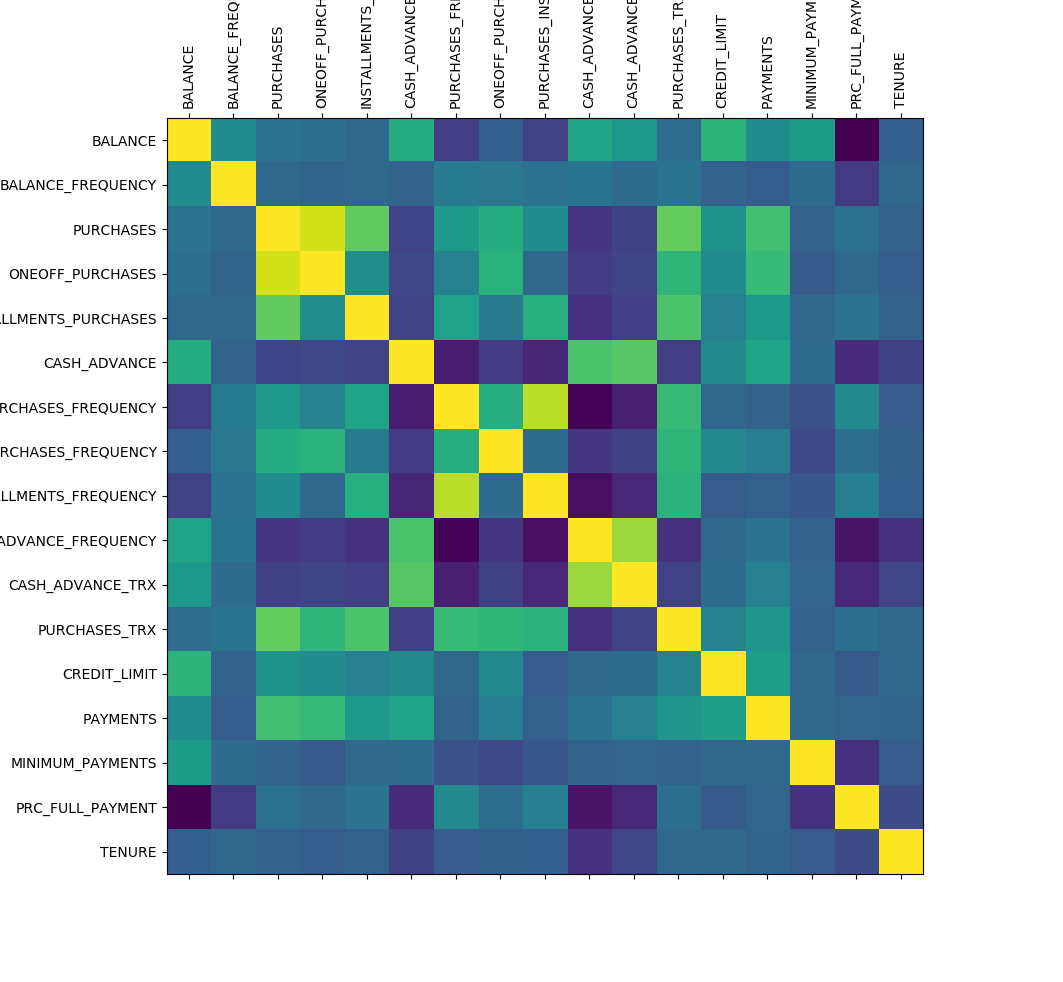

In [46]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(data)

Vamos aplicar PCA aos dados para poder visualizar alguns gráficos e ver se há claramente grupos separáveis

In [102]:
relevant_data = data.drop('CUST_ID', axis=1)
from sklearn import preprocessing
scaled_features = preprocessing.scale(relevant_data)
np.isnan(scaled_features).any()

/home/morgan/anaconda3/envs/linear_algebra/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


False

In [108]:
from sklearn import decomposition
pca_decom = decomposition.PCA(n_components=2)
pca_result = pca_decom.fit_transform(scaled_features)
pca_result

array([[-1.6843645 , -1.069889  ],
       [-1.13181243,  2.51063641],
       [ 0.96926459, -0.38354515],
       ...,
       [-0.93040202, -1.80643227],
       [-2.33845883, -0.65109912],
       [-0.55882362, -0.40058507]])

<IPython.core.display.Javascript object>


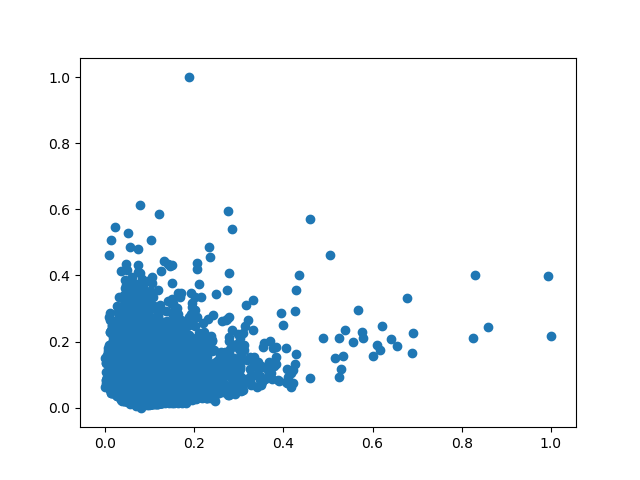

In [119]:
scaler = preprocessing.MinMaxScaler()
pca_result = scaler.fit_transform(pca_result)

plt.scatter(x=pca_result[:,0], y=pca_result[:,1])

Em duas dimensões, há um espalhamento interessante, mas é dificil visualizar facilmente clusters

<IPython.core.display.Javascript object>


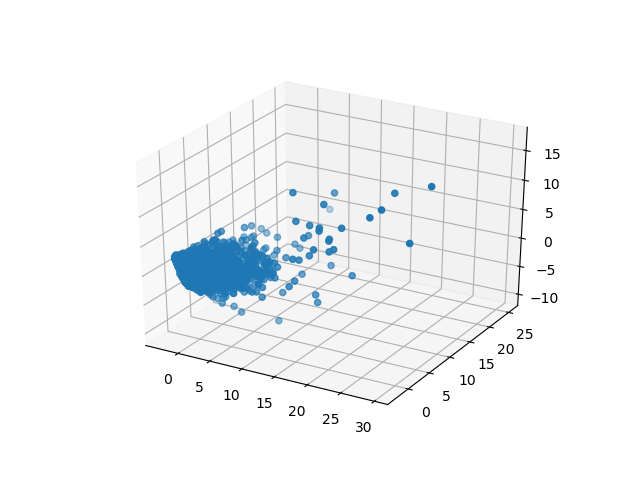

In [116]:
from mpl_toolkits.mplot3d import Axes3D
three_dim = decomposition.PCA(n_components=3).fit_transform(scaled_features)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(three_dim[:,0], three_dim[:,1], three_dim[:,2])

Ainda está difícil verificar visualmente separação clara entre grupos. Vamos aplicar as decomposições espectrais propostas para vermos se chegamos a alguma conclusao

# Grafo de similaridade

De acordo com o artigo, a escolha da matriz de similaridade pode alterar bastante os resultados do nosso clustering. Os autores sugerem que se utilize o k-nearest neighbor graph, inicialmente, por ele ser menos sensível aos parâmetros

#### KNN graph
De acordo com os autores, devemos garantir que o grafo seja totalmente conexo, de preferência caso não possamos garantir que as componentes conexas sejam os clusters em si. Não conhecemos muito sobre o problema, então vamos buscar um grafo mais conexo possível

In [184]:
knn_graph = sklearn.neighbors.kneighbors_graph(scaled_features, n_neighbors=3, mode='connectivity', include_self=True)
knn_graph

<8950x8950 sparse matrix of type '<class 'numpy.float64'>'
	with 26850 stored elements in Compressed Sparse Row format>

In [185]:
G = nx.from_scipy_sparse_matrix(knn_graph)
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[8814,
 12,
 11,
 10,
 9,
 7,
 6,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [188]:
knn_graph = sklearn.neighbors.kneighbors_graph(scaled_features, n_neighbors=5, mode='connectivity', include_self=True)
knn_graph

G = nx.from_scipy_sparse_matrix(knn_graph)
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[8950]

Com k=5 conseguimos um grafo completo, vamos utilizá-lo

De agora em diante, vamos testar os diferentes algoritmos apresentados no artigo. Nota-se que a principal diferença entre eles se dá no método de cálculo da matrix Laplaciana, portanto, as próximas seções estão quebradas de acordo com isso

## Unnormalized spectral clustering 

In [189]:
laplacian = nx.laplacian_matrix(G)

In [193]:
laplacian.toarray()

array([[ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 13., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  7.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  5.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  4.]])